In [1]:
import cv2
import requests
import numpy as np
import time
from IPython.display import Image, clear_output, display

In [2]:
# 서버 주소와 포트를 맞춰주세요.
url = 'http://192.168.0.80:5000/video_feed'

# streaming 모드로 HTTP 요청을 보냅니다.
response = requests.get(url, stream=True)
bytes_data = b''

In [3]:
def display_frame(frame):
    if frame is not None:
        _, buffer = cv2.imencode('.jpg', frame)
        clear_output(wait=True)
        display(Image(data=buffer.tobytes()))
        time.sleep(0.001)

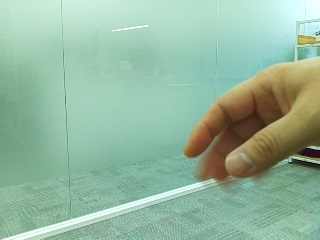

In [4]:
play_time = 20
start_time = time.time()
for chunk in response.iter_content(chunk_size=1024):
    bytes_data += chunk
    start = bytes_data.find(b'\xff\xd8')
    end = bytes_data.find(b'\xff\xd9')

    if start != -1 and end != -1:
        jpg = bytes_data[start:end+2]
        bytes_data = bytes_data[end+2:]
        frame = cv2.imdecode(np.frombuffer(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
        display_frame(frame)

        if time.time() - start_time > play_time: break